# Notebook imports


In [1]:
from sklearn.datasets import fetch_openml
# due changes on sci-learn version the example dataset for Boston House prices
# is not available, but you can download from openml site using fecth_openml module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gate Data

[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = fetch_openml(name='boston', version=1)

In [3]:
type(boston_dataset)

sklearn.utils._bunch.Bunch

In [4]:
boston_dataset


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [5]:
dir(boston_dataset)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [6]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

### Data points and features

In [7]:
type(boston_dataset.data)

pandas.core.frame.DataFrame

In [8]:
boston_dataset.data.shape #chaining dot notation

(506, 13)

In [9]:
boston_dataset.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [10]:
# Actual prices in thousands of US$
boston_dataset.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Data exploration with Pandas Dataframe

In [11]:
# Create a panda Dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add a column with prices (target)
data['PRICE'] = boston_dataset.target

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [14]:
data.count() #number of rowd for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - checking for missing values

In [15]:
pd.isnull(data).any() #check for missing value in any column

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


### Due the origin of this dataset, 2 columns (CHAS and RAD) came as category instead float and require some transformation

In [17]:
data['CHAS'] = data['CHAS'].astype('float64')
data['RAD'] = data['RAD'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualing Data - Histograms, Distributions and Bar Charts 

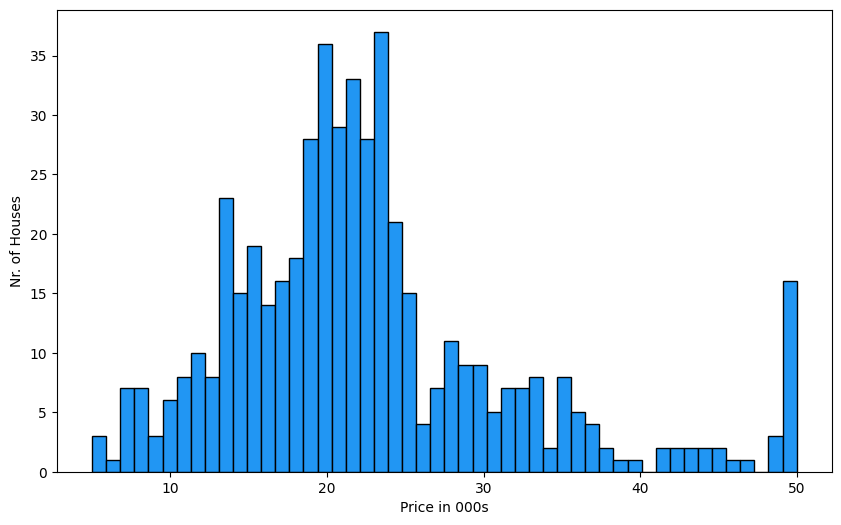

In [18]:
# color web site: https://www.materialpalette.com/
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, edgecolor='black', color='#2196F3')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

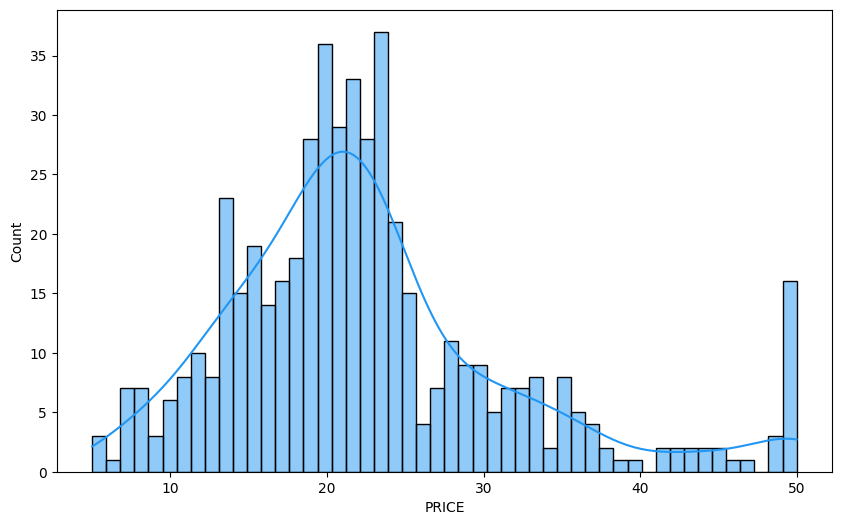

In [19]:
# color web site: https://www.materialpalette.com/
plt.figure(figsize=(10,6))
sns.histplot(data=data['PRICE'], bins=50, color='#2196F3', kde=True)
plt.show()

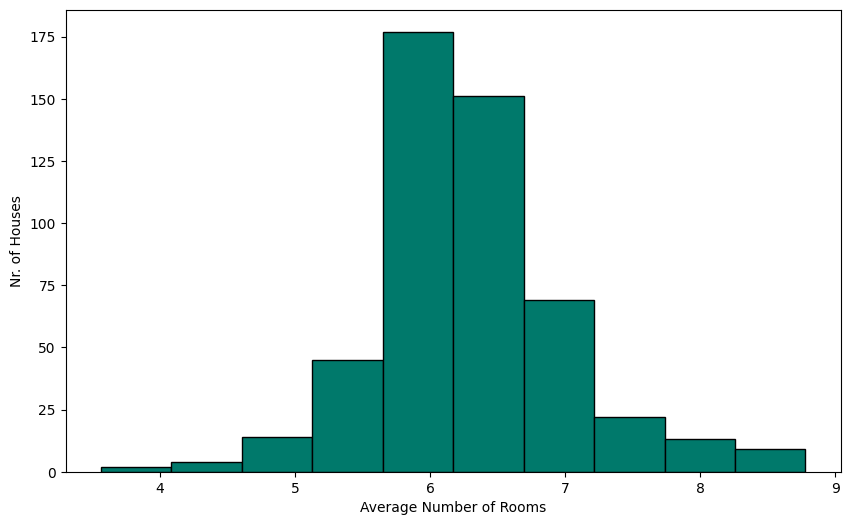

In [20]:
# color web site: https://www.materialpalette.com/
plt.figure(figsize=(10,6))
plt.hist(data['RM'], edgecolor='black', color='#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [21]:
data['RM'].mean()

np.float64(6.284634387351779)

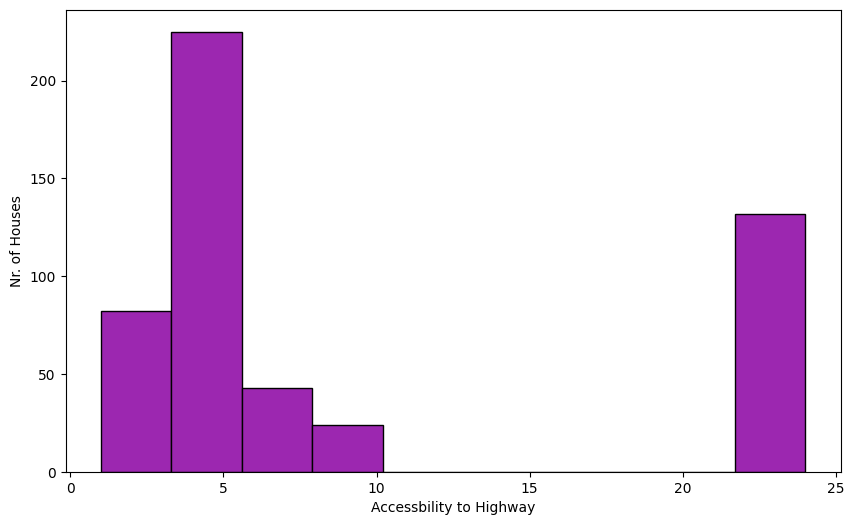

In [22]:
# color web site: https://www.materialpalette.com/
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], edgecolor='black', color='#9C27B0')
plt.xlabel('Accessbility to Highway')
plt.ylabel('Nr. of Houses')
plt.show()

In [23]:
data['RAD'].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

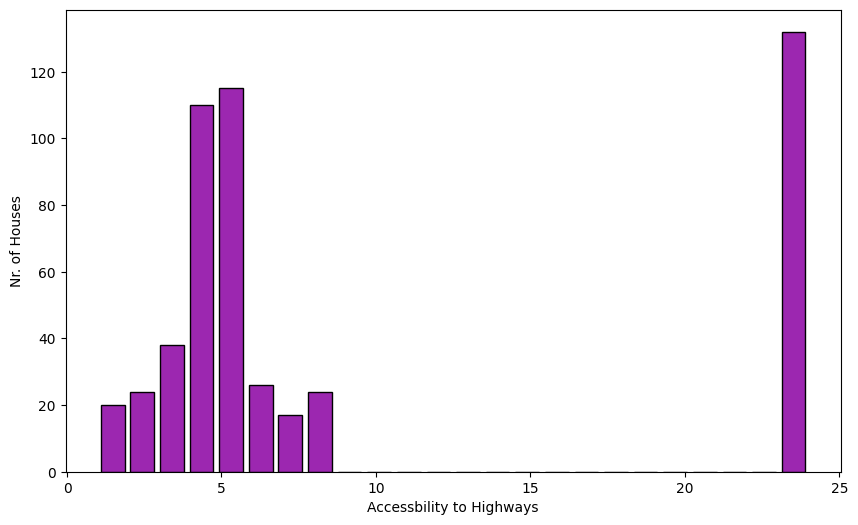

In [24]:
# color web site: https://www.materialpalette.com/
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, edgecolor='black', color='#9C27B0', rwidth=0.8)
plt.xlabel('Accessbility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

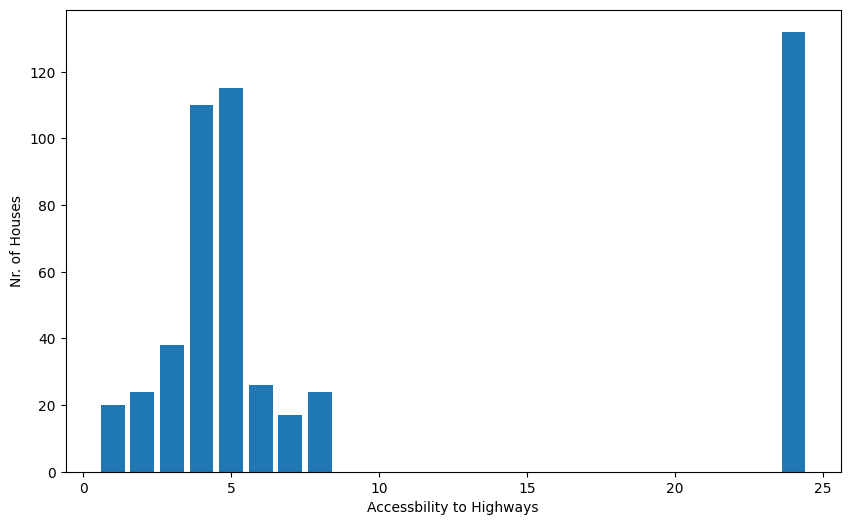

In [25]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10,6))
plt.xlabel('Accessbility to Highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [26]:
data['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

### Descritive Statistics

In [27]:
data['PRICE'].min()

np.float64(5.0)

In [28]:
data['PRICE'].max()

np.float64(50.0)

In [29]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [30]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [31]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [32]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [33]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [34]:
# Check the correlation between price and number of rooms on our dataset
data['PRICE'].corr(data['RM'])

np.float64(0.6953599470715393)

In [35]:
# Chalenge: calculate the correlation between property prices and the pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])

np.float64(-0.5077866855375616)

In [36]:
data.corr() # Pearson Correlation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [37]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

<function matplotlib.pyplot.show(close=None, block=None)>

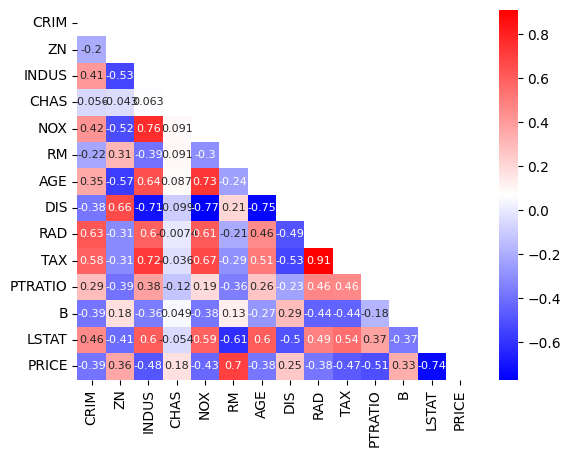

In [38]:
plt.Figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":8}, cmap='bwr')
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plot between DIS and NOX

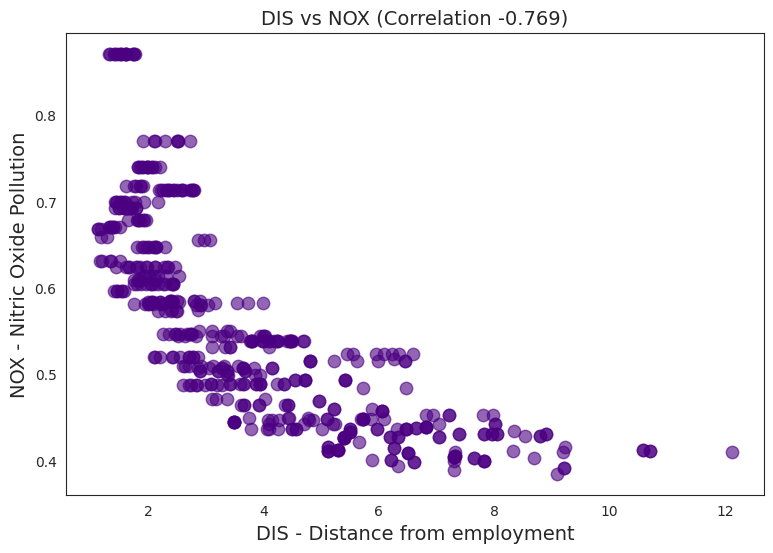

In [39]:
nox_dis_corr = data['NOX'].corr(data['DIS'])
plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr:.3f})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

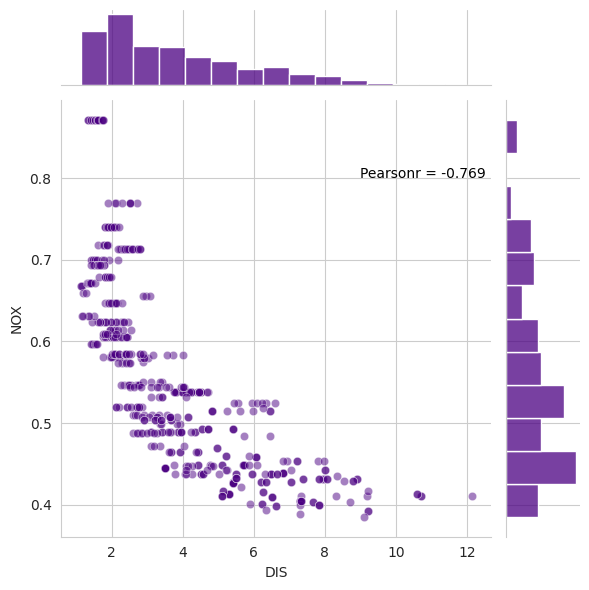

In [40]:
# Same thing but using sns library
# set sns style
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='indigo', joint_kws={'alpha':0.5})
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)
# new version of sns do not show the correlation on graph, so add using plt.text will fix it
plt.text(x=9, y=0.8, s=f'Pearsonr = {nox_dis_corr}', color='black')

plt.show()

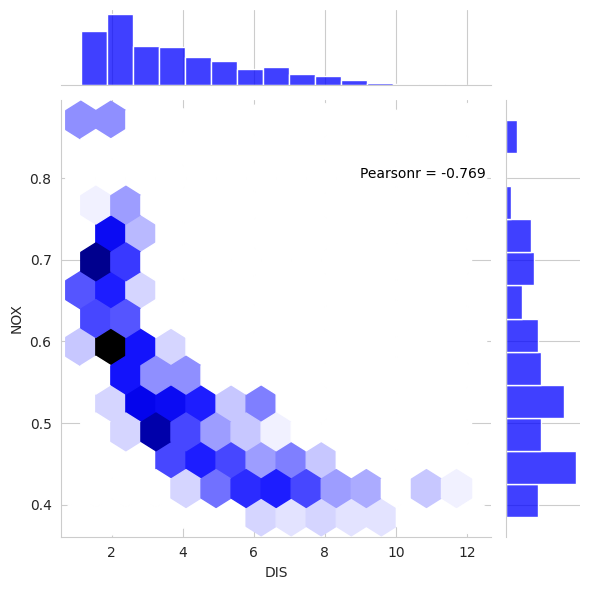

In [41]:
# Same thing but using sns library
# set sns style
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='blue', kind='hex')
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)
# new version of sns do not show the correlation on graph, so add using plt.text will fix it
plt.text(x=9, y=0.8, s=f'Pearsonr = {nox_dis_corr}', color='black')

plt.show()

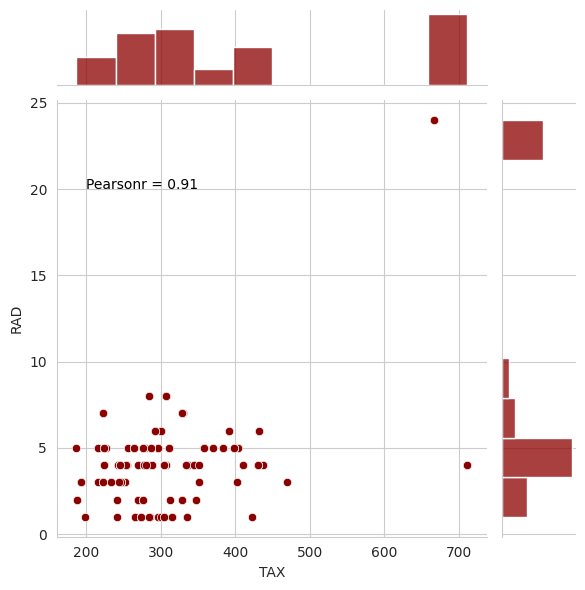

In [42]:
# Same thing but using sns library
# set sns style
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], color='darkred')
tax_rad_corr = round(data['TAX'].corr(data['RAD']),3)
# new version of sns do not show the correlation on graph, so add using plt.text will fix it
plt.text(x=200, y=20, s=f'Pearsonr = {tax_rad_corr}', color='black')

plt.show()

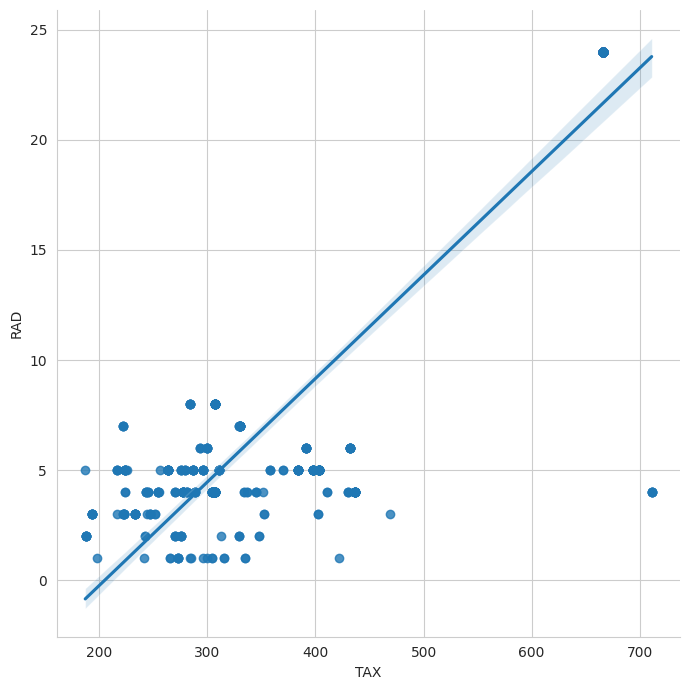

In [43]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

## Chalenge: create a scatter plot between the house prices and the numebr of rooms (RM)

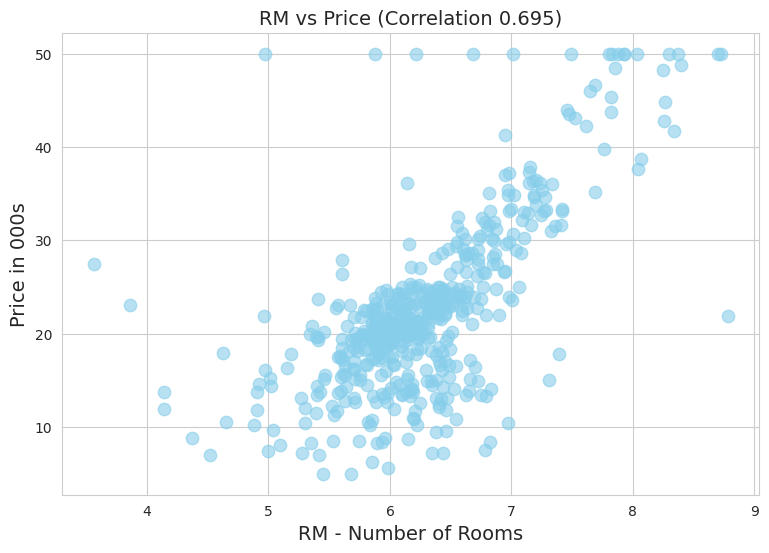

In [44]:
rm_price_corr = data['RM'].corr(data['PRICE'])
plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs Price (Correlation {rm_price_corr:.3f})', fontsize=14)
plt.xlabel('RM - Number of Rooms', fontsize=14)
plt.ylabel('Price in 000s', fontsize=14)
plt.show()

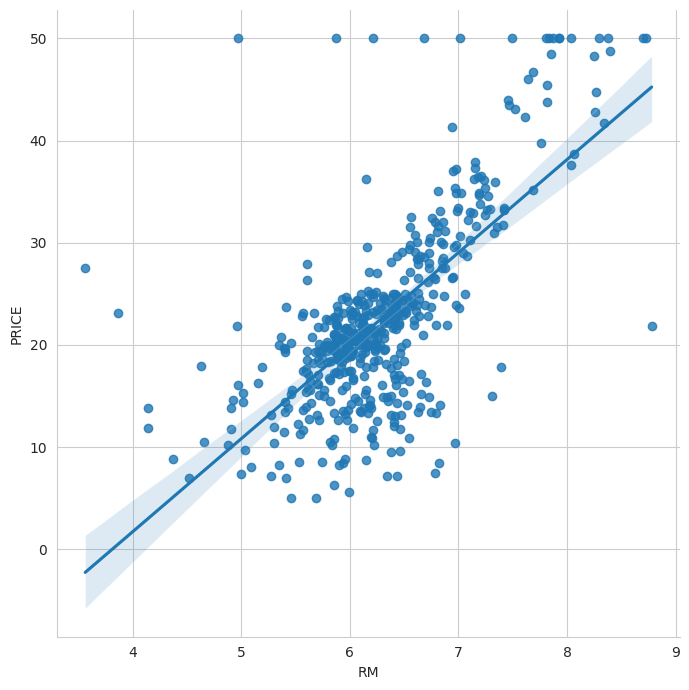

In [45]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

In [46]:
%%time
#sns.pairplot(data)

CPU times: user 9 μs, sys: 1e+03 ns, total: 10 μs
Wall time: 16 μs


In [47]:
%%time
#sns.pairplot(data=data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
#plt.show()

CPU times: user 7 μs, sys: 0 ns, total: 7 μs
Wall time: 14.3 μs


## Training & Test Dataset Split

In [48]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# % of training set
len(X_train)/len(features)

0.7984189723320159

In [49]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [50]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [51]:
# Showing the Thetas
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coef'])

Intercept 36.53305138282453


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [52]:
# Chalenge: print out r-squared for training and test data
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115641


## Data Transformation

In [53]:
data['PRICE'].skew()

np.float64(1.1080984082549072)

In [54]:
y_log = np.log(data['PRICE'])
y_log.head()
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [55]:
y_log.skew()

np.float64(-0.33032129530987864)

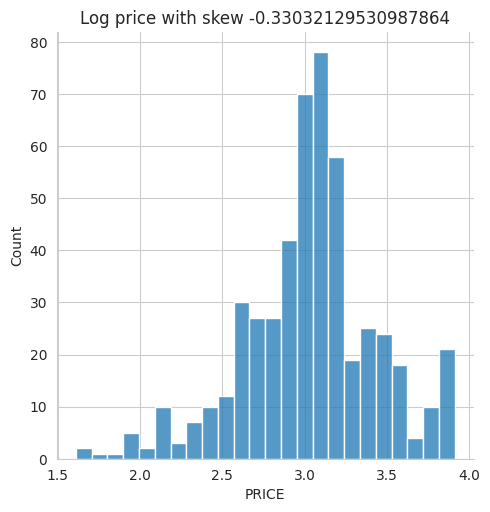

In [56]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

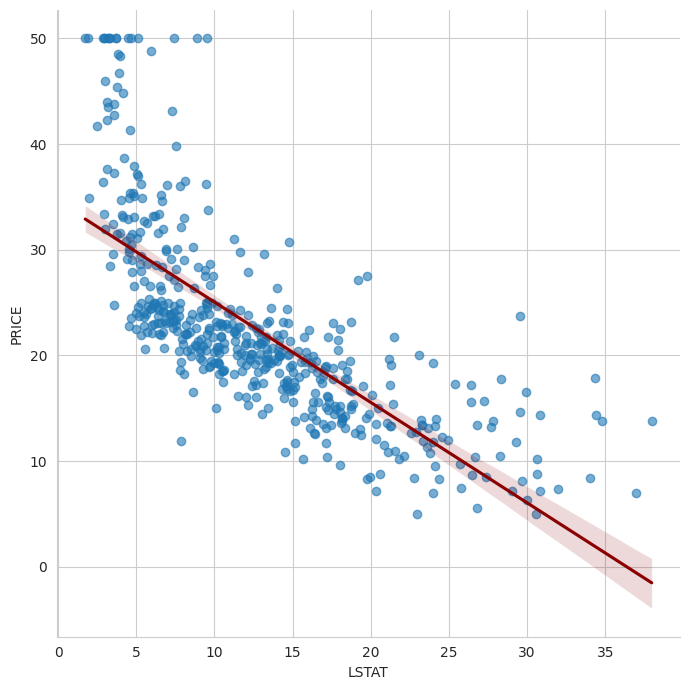

In [57]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})
plt.show()

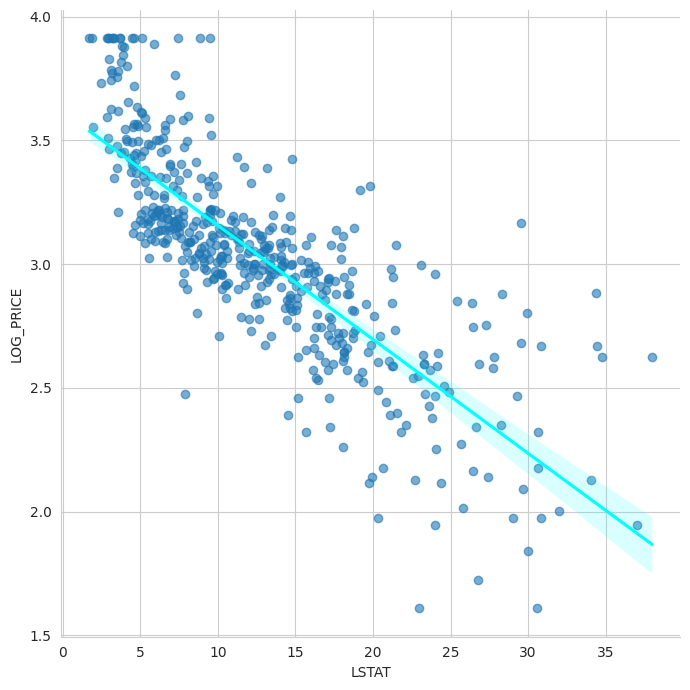

In [58]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'cyan'})
plt.show()

## Regression using log prices

In [59]:
prices = np.log(data['PRICE'])  # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

# Showing the Thetas
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coef'])

Training data r-squared: 0.7930234826697584
Test data r-squared: 0.744692230626075
Intercept 4.059943871775208


,Coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [60]:
# Charles River property premium
# CHAS = 0.080331
np.e**0.080331

1.0836456950439142

## p values & Evaluation Coefficients

In [61]:
# if p-value < 0.05 is significante
# if p-value > 0.05 is not significant

X_incl_const = sm.add_constant(X_train)

#OLS = Ordinary Least Square

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

#results.params
#results.pvalues
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# INDUS and AGE are not significants

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


### Test Multicollinearity

$$ TAX = \alpha _0 +  \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12} LSTAT $$

$$ VIF _{TAX} = \frac {1} {(1- R _{TAX}²)} $$

In [62]:
# First argument must be np.ndarray and the second is the index (1 = CRIM feature)
# Is necessary convert our DataFrame in Array, we use the attribute .values
#variance_inflation_factor(exog=X_incl_const, exog_idx=1)
type(X_incl_const)
type(X_incl_const.values)
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

np.float64(1.7145250443932485)

In [63]:
# Chalenge : output the number of columns on X_incl_const
#len(X_incl_const.columns)
#X_incl_const.shape
X_incl_const.shape[1]

14

In [64]:
# Chalenge : print out all VIF for all features and save on list
# solution 1
#vif = [] # create an empty list
# for i in range(X_incl_const.shape[1]):
#     vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

# solution 2
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                            exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name':X_incl_const.columns,
              'vif': np.around(vif,2)})

# if VIF is > 10 require our attenion, some authors prefer to use the limit of 5
# In our study there is no VIF > 10, no indication of collinearity

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


### Lesson 77
## Model Simplification & BIC
Lower is better

In [67]:
# Original model with log prices and all features
X_incl_const = sm.add_constant(X_train)

#OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Chalenge: find and check official docs for results object and print out BIC and r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478898
r-squared is 0.7930234826697583


In [68]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

#OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC without INDUS features is', results.bic)
print('r-squared is', results.rsquared)

BIC without INDUS features is -145.1450885559114
r-squared is 0.7927126289415162


In [69]:
# Reduced model #2 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

#OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC without INDUS features is', results.bic)
print('r-squared is', results.rsquared)

BIC without INDUS features is -149.49934294224678
r-squared is 0.7918657661852815


In [71]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)
# NaN = Not a Number

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000
